# Food Delivery Orders EDA
**Author:** Jessy Andújar Cruz

**Date:** 2025-05-27

## Introduction

### Project Description
This project aims to perform an exploratory data analysis (EDA) on a food delivery orders dataset. By investigating trends and patterns in customer orders, cuisine preferences, order costs, and delivery performance, the goal is to uncover actionable insights that could help food delivery platforms and restaurants improve their service and operations.

### Objective
The primary objectives of this analysis are:
- To clean and prepare the dataset for analysis by addressing missing values, data types, and outliers.
- To perform descriptive and visual analyses on order characteristics such as cuisine type, cost, preparation, and delivery times.
- To engineer new features that allow for deeper insights, such as identifying late deliveries and evaluating the relationship between food preparation and delivery times.
- To segment orders by cost and satisfaction, helping identify top-selling cuisines, high-value customers, and potential areas for operational improvement.

### Dataset Information
The dataset, obtained from [Kaggle: Food Ordering and Delivery App Dataset](https://www.kaggle.com/datasets/ahsan81/food-ordering-and-delivery-app-dataset), contains 1,898 records of food delivery orders. Each record includes details such as:
- Order and customer IDs
- Restaurant name and cuisine type
- Cost of the order
- Day of the week for the order
- Customer rating
- Food preparation and delivery times

This analysis will provide a foundation for further data-driven strategies in the food delivery sector.

#### Import libraries

In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Load dataset

In [101]:
raw_data = pd.read_csv('../data/raw/food_order.csv')

In [102]:
df = raw_data.copy() # Create a copy of the raw data

#### Data overview

In [326]:
df.sample(10) # display a random sample of 10 rows from the dataset

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
172,1477102,75484,Five Guys Burgers and Fries,American,13.05,Weekend,Not given,34,27
805,1476642,277898,Blue Ribbon Fried Chicken,American,12.18,Weekend,Not given,25,17
1300,1477153,120353,Parm,Italian,25.27,Weekday,Not given,27,27
688,1477922,304587,Westville Hudson,American,33.03,Weekend,5,25,18
1415,1477344,99621,Jack's Wife Freda,Mediterranean,5.67,Weekday,3,24,29
1368,1478021,97991,Blue Ribbon Sushi Bar & Grill,Japanese,22.26,Weekday,Not given,20,26
329,1477677,181782,Parm,Italian,8.78,Weekend,3,23,26
1459,1476918,135769,Blue Ribbon Sushi,Japanese,18.04,Weekend,Not given,35,28
321,1476867,91879,da Umberto,Italian,12.27,Weekday,5,20,30
1082,1478432,331143,Waverly Diner,American,14.60,Weekday,3,20,32


In [327]:
df.info() # check data types and null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


In [328]:
df.describe() # get summary statistics for numerical columns

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000


#### Data cleaning an manipulation
- Create the same logic for 'order_total_time'.
- Create a column if the delivery was good or not based on the client rating (4-5 is good)
- Based on the 25%, 50% and 75% percentile add a column if the cost_of_the_order is expensive, normal or cheap.
- Customer-level features: e.g., number of orders per customer (loyalty), average spend.
- Restaurant-level features: e.g., total orders, average rating.

##### Processed Dataset

In [329]:
df = df.copy() # create a copy of the original DataFrame

##### Check for duplicates: (e.g., duplicated order_id)


In [330]:
order_is_duplicate = df['order_id'].duplicated().sum() # check for duplicate order IDs
print(f"Number of duplicate order IDs: {order_is_duplicate}")

customer_is_duplicate = df['customer_id'].duplicated().sum() # check for duplicate customer IDs
print(f"Number of duplicate customer IDs: {customer_is_duplicate}")



Number of duplicate order IDs: 0
Number of duplicate customer IDs: 698


##### Standardize categorical values: e.g., ensure day_of_the_week has only “Weekend”/“Weekday” (no typos or variations).

In [331]:
print('Orders by day of the week:')
df['day_of_the_week'].value_counts() # count the number of orders for each day of the week


Orders by day of the week:


day_of_the_week
Weekend    1351
Weekday     547
Name: count, dtype: int64

##### Ensure all costs are positive.

In [332]:
print('Count of pos vs neg values:')
pos = (df['cost_of_the_order'] >= 0).sum()
neg = (df['cost_of_the_order'] < 0).sum()
print(f"Non-negative values: {pos}")
print(f"Negative values: {neg}")

Count of pos vs neg values:
Non-negative values: 1898
Negative values: 0


##### Make sure food prep and delivery times are non-negative.

In [333]:
print('Food preparation time values are non-negative:')
food_prep_pos = df['food_preparation_time'] >= 0
food_prep_neg = df['food_preparation_time'] < 0
print('Non-negative values:', food_prep_pos.sum())
print('Negative values:', food_prep_neg.sum())

print('\nDelivery Time values are non-negative:')
delivery_time_pos = df['delivery_time'] >= 0
delivery_time_neg = df['delivery_time'] < 0
print(f'Non-negative values: {delivery_time_pos.sum()}')
print(f'Negative values: {delivery_time_neg.sum()}')

Food preparation time values are non-negative:
Non-negative values: 1898
Negative values: 0

Delivery Time values are non-negative:
Non-negative values: 1898
Negative values: 0


##### Check for outliers: in numerical columns (prep time, delivery time, cost)


Number of outliers detected using IQR method: 0


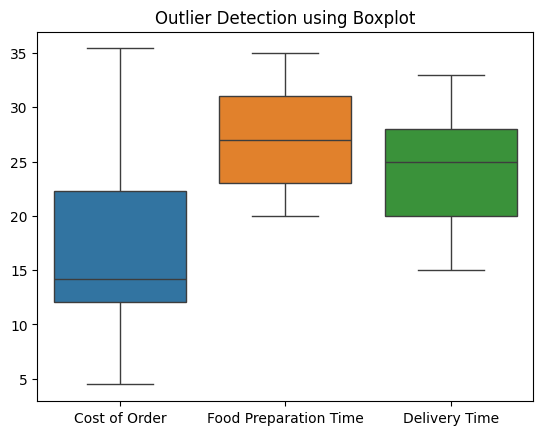

In [334]:
df_numeric = df[['cost_of_the_order', 'food_preparation_time', 'delivery_time']]
Q1 = df_numeric.quantile(0.25)
Q3 = df_numeric.quantile(0.75)
IQR = Q3 - Q1
outliers_iqr = (df_numeric < (Q1 - 1.5 * IQR)) | (df_numeric > (Q3 + 1.5 * IQR))

outliers = outliers_iqr.any(axis=1)
print(f"Number of outliers detected using IQR method: {outliers.sum()}")

cost = df['cost_of_the_order']
food_prep_time = df['food_preparation_time']
delivery_time = df['delivery_time']
sns.boxplot(data=pd.DataFrame({
    'Cost of Order': cost,
    'Food Preparation Time': food_prep_time,
    'Delivery Time': delivery_time
}))
plt.title('Outlier Detection using Boxplot')
plt.show()

#####  Change rating column to type int16 and use NaN for 'not given' rating.


In [335]:
df['rating'] = df['rating'].replace('Not given', np.nan)  # Replace 'Not given' with NaN
df['rating'] = df['rating'].astype('float').astype('Int16')  # Convert rating to nullable integer type
print('Rating values after conversion:')
df['rating'].value_counts(dropna=False) # Display counts of ratings including NaN values

Rating values after conversion:


rating
<NA>    736
5       588
4       386
3       188
Name: count, dtype: Int64

##### Add an order_total_time column

In [541]:
df['order_total_time'] = df['food_preparation_time'] + df['delivery_time']
df[['order_id', 'order_total_time']].sample(10)  # Display a random sample of 10 rows from the new column


,order_id,order_total_time
1807,1477716,48
1251,1476886,47
259,1478279,48
1153,1478262,53
805,1476642,42
96,1476921,56
9,1477311,55
952,1478162,59
1460,1477935,42
467,1478337,59


##### Add a food_preparation_time_mean column to help the restaurant improve food preparation times

In [ ]:
df['food_preparation_time_mean'] = df.groupby('restaurant_name')['food_preparation_time'].transform('mean')
df[['restaurant_name', 'food_preparation_time', 'food_preparation_time_mean']].sample(10)  # Display a random sample of 10 rows with the new column


,restaurant_name,food_preparation_time,food_preparation_time_mean
1805,The Meatball Shop,29,27.181818
1554,V-Nam Cafe,31,26.000000
616,RedFarm Broadway,33,27.593220
531,Sushi of Gari Tribeca,22,28.125000
1467,Parm,33,27.308824
345,Sushi Samba,30,29.090909
730,Sarabeth's East,34,28.857143
1001,Sushi of Gari Tribeca,22,28.125000
3,Blue Ribbon Fried Chicken,25,27.197917
309,Rubirosa,31,28.243243


In [563]:
df[df['restaurant_name'] == 'Sushi of Gari 46'][['restaurant_name', 'food_preparation_time', 'food_preparation_time_mean']].head() # Display rows for a specific restaurant to check the food preparation time against the mean

,restaurant_name,food_preparation_time,food_preparation_time_mean
29,Sushi of Gari 46,20,27.540541
56,Sushi of Gari 46,24,27.540541
159,Sushi of Gari 46,31,27.540541
226,Sushi of Gari 46,35,27.540541
237,Sushi of Gari 46,24,27.540541


##### Based on the new added column 'food_preparation_time_mean' create a column to check if food is late.

In [570]:
df['food_is_late'] = df['food_preparation_time'] > df['food_preparation_time_mean']
df[['restaurant_name', 'food_preparation_time', 'food_preparation_time_mean', 'food_is_late']].sample(10)  # Display a random sample of 10 rows with the new column

,restaurant_name,food_preparation_time,food_preparation_time_mean,food_is_late
1614,Shake Shack,31,27.945205,True
951,RedFarm Hudson,30,27.163636,True
1888,The Meatball Shop,21,27.181818,False
833,TAO,35,26.775510,True
792,The Meatball Shop,25,27.181818,False
1238,Shake Shack,26,27.945205,False
266,The Meatball Shop,27,27.181818,False
1362,Blue Ribbon Sushi,31,27.924370,True
1306,Bareburger,24,27.407407,False
1641,The Meatball Shop,31,27.181818,True


##### Add a order_total_time_mean column

In [ ]:
df['order_total_time_mean'] = df.groupby('restaurant_name')['order_total_time'].transform('mean')
df[['restaurant_name', 'order_total_time', 'order_total_time_mean']].sample(10)  # Display a random sample of 10 rows with the new column


,restaurant_name,order_total_time,order_total_time_mean
747,Don's Bogam BBQ & Wine Bar,49,50.666667
1830,Sushi Samba,61,53.727273
309,Rubirosa,48,51.918919
251,Blue Ribbon Sushi Bar & Grill,48,49.704545
544,Blue Ribbon Sushi Izakaya,59,52.206897
1030,Crema Restaurante,61,61.000000
116,Shake Shack,58,52.607306
1897,Blue Ribbon Sushi,52,51.865546
444,Shake Shack,64,52.607306
788,Rubirosa,58,51.918919


In [566]:
df[df['restaurant_name'] == 'Sushi of Gari 46'][['restaurant_name', 'order_total_time', 'order_total_time_mean']].head() # Display rows for a specific restaurant to check the total order time against the mean

,restaurant_name,order_total_time,order_total_time_mean
29,Sushi of Gari 46,49,53.513514
56,Sushi of Gari 46,48,53.513514
159,Sushi of Gari 46,64,53.513514
226,Sushi of Gari 46,58,53.513514
237,Sushi of Gari 46,44,53.513514


##### Based on column 'order_total_time' create a column to check if order is late

In [571]:
df['order_is_late'] = df['order_total_time'] > df['order_total_time_mean']
df[['restaurant_name', 'order_total_time', 'order_total_time_mean', 'order_is_late']].sample(10)  # Display a random sample of 10 rows with the new column

,restaurant_name,order_total_time,order_total_time_mean,order_is_late
1509,Han Dynasty,48,50.565217,False
869,TAO,45,49.938776,False
599,TAO,43,49.938776,False
1380,Nobu Next Door,53,52.333333,True
1120,Han Dynasty,42,50.565217,False
129,Shake Shack,53,52.607306,True
100,Rubirosa,57,51.918919,True
851,Blue Ribbon Fried Chicken,40,51.343750,False
1076,Blue Ribbon Sushi Izakaya,42,52.206897,False
1338,Hummus Place,56,52.333333,True
